In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
!ls '/content/drive/My Drive/pruebas/'

5k_model.hdf5  model3.h5  modelB.hdf5  pruebas.ipynb
model2b.h5     modelB.h5  modelC.h5


In [0]:
path = '/content/drive/My Drive/pruebas/'
import sys
sys.path.insert(1, path)

##import image_dataset #file located in colab
import numpy as np
import tensorflow as tf
#network libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#pictures libraries
import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

In [0]:
x_train = np.load(path+"data_x.npz")
y_train = np.load(path+"data_y.npz")
x_train = x_train.f.arr_0 
y_train = y_train.f.arr_0 
#y_train = np.round(y_train,decimals = 1)
#x_train =x_train/255
#split = int(x_train.shape[0]*0.9)
#x_val = x_train[split:]
#y_val = y_train[split:]
#x_train = x_train[:split]
#y_train = y_train[:split]
print(x_train.shape)
print(y_train.shape)
#print(x_val.shape)
#print(y_val.shape)


(5000, 96, 128, 3)
(5000,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08a29cda0>]],
      dtype=object)

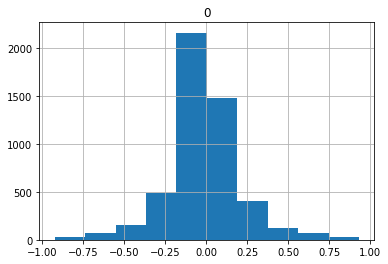

In [0]:
#import PIL 
#x_train = np.array(list(map(lambda x:np.array(PIL.Image.fromarray(x,'RGB').filter(PIL.ImageFilter.FIND_EDGES))/255,x_train)))
#y_train = y_train.reshape(y_train.shape[0])
import pandas as pd
pd.DataFrame(y_train).hist()

In [0]:
import PIL
def find_walls(data):
    """
    Return all wall indexs found
    """
    total = len(data)
    funv = np.vectorize(lambda x: 0 if x <100 else 1)
    data = map(lambda x: 0==sum(funv(np.mean(PIL.Image.fromarray(x,'RGB').filter(PIL.ImageFilter.FIND_EDGES),axis=2).reshape(-1))),data)
    wall_index = np.argwhere(np.array(list(data)).astype(np.int64) == 1).reshape(-1)
    print("finish: {} front walls found, {:.2f}% of the total data".format(wall_index.shape[0],wall_index.shape[0]*100/total))
    return wall_index

wall_index = find_walls(x_train)


finish: 963 front walls found, 19.26% of the total data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08a1d00f0>]],
      dtype=object)

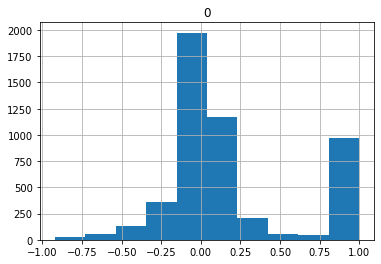

In [0]:
for i in wall_index:
  y_train[i] = 1

#x_train = x_train[[wall_index]]
#y_train = y_train[[wall_index]]
pd.DataFrame(y_train).hist()

In [0]:
x_train = x_train/255.

In [0]:
keras.backend.clear_session()
#Creation of keras sequence CNN
model = Sequential()

#Layer 1 and 2 filtering 3x3x32 + maxpooling 3x3 + dropout
model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same', input_shape=(96, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer 3 and 4 filtering 3x3x64 + maxpooling 3x3 + dropout
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten and fully connected layer
model.add(Flatten())
model.add(Dense(16, activation='tanh'))
model.add(Dropout(rate=0.3))

model.add(Dense(1, activation='tanh'))

# opt = keras.optimizers.RMSprop(learning_rate = learn_rate, decay=1e-6)
# opt = keras.optimizers.Adam(learning_rate=learn_rate)
opt = keras.optimizers.Adam( learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 128, 8)        224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                196624    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [0]:
history = model.fit(x_train, y_train,
              validation_split = 0.2,  
              batch_size=12,
              epochs=10,
              shuffle=True)

Epoch 1/10
334/334 [==============================] - 2s 6ms/step - loss: 0.1396 - val_loss: 0.1454
Epoch 2/10
334/334 [==============================] - 2s 5ms/step - loss: 0.1099 - val_loss: 0.1230
Epoch 3/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0999 - val_loss: 0.1236
Epoch 4/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0895 - val_loss: 0.1205
Epoch 5/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0823 - val_loss: 0.1206
Epoch 6/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0820 - val_loss: 0.1262
Epoch 7/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0771 - val_loss: 0.1289
Epoch 8/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0756 - val_loss: 0.1304
Epoch 9/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0736 - val_loss: 0.1252
Epoch 10/10
334/334 [==============================] - 2s 5ms/step - loss: 0.0741 - val_loss: 0.1306

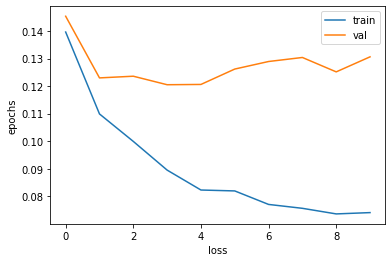

In [0]:
fig = plt.figure(1)
fig.patch.set_facecolor('#FFFFFF')
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend()

In [0]:

left  = 1.125  # the left side of the subplots of the figure
right = 2  # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1.0      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

TypeError: ignored

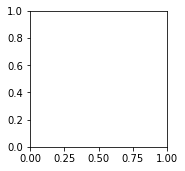

In [0]:
i = 0
j = 1
sample = np.random.choice(np.arange(len(y_train)),size=20)
fig = plt.figure(figsize = (10,50))
fig.patch.set_facecolor('#FFFFFF')
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
num_per_row = 4
for s in sample:
    img = x_train[s]
    y = y_train[s]
    angular = model.predict(img.reshape(1,96,128,3))
    plt.subplot(20, num_per_row, i+1)
    plt.title("label: {:.2f} \n prediction {:.2f}".format(y,angular[0][0]))
    plt.imshow(img)
    i += 1

In [0]:
y_predict = model.predict(x_train)

Text(0, 0.5, 'y')

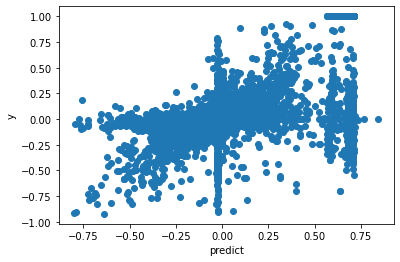

In [0]:
fig = plt.figure()
fig.patch.set_facecolor('#FFFFFF')
plt.scatter(y_predict, y_train)
plt.xlabel('predict')
plt.ylabel("y")

In [0]:
#model.save(path+"model3.h5")

In [0]:
del(y_predict)